🎯 Tables Used:
COMPANY
ID (Primary Key)

NAME, AGE, ADDRESS, SALARY

DEPARTMENT
ID (Primary Key)

DEPT, EMP_ID (Foreign Key referencing COMPANY.ID)

In [ ]:
import sqlite3

db = "e111.db"

In [ ]:
conn = sqlite3.connect(db)

print ("Opened database successfully")

In [ ]:
conn.execute("PRAGMA foreign_keys = ON;")

In [ ]:
import sqlite3

conn = sqlite3.connect(db)
print ("Opened database successfully")

conn.execute('''CREATE TABLE COMPANY
         (ID INT PRIMARY KEY     NOT NULL,
         NAME           TEXT    NOT NULL,
         AGE            INT     NOT NULL,
         ADDRESS        CHAR(50),
         SALARY         REAL);''')
print ("Table created successfully")

conn.close()

In [ ]:
import sqlite3

conn = sqlite3.connect(db)
print ("Opened database successfully")

conn.execute("INSERT INTO COMPANY (ID,NAME,AGE,ADDRESS,SALARY) VALUES (1, 'Paul', 32, 'California', 20000.00 )");

conn.execute("INSERT INTO COMPANY (ID,NAME,AGE,ADDRESS,SALARY) VALUES (2, 'Allen', 25, 'Texas', 15000.00 )");

conn.execute("INSERT INTO COMPANY (ID,NAME,AGE,ADDRESS,SALARY) VALUES (3, 'Teddy', 23, 'Norway', 20000.00 )");

conn.execute("INSERT INTO COMPANY (ID,NAME,AGE,ADDRESS,SALARY) VALUES (4, 'Mark', 25, 'Rich-Mond ', 65000.00 )");

conn.execute("INSERT INTO COMPANY (ID,NAME,AGE,ADDRESS,SALARY) VALUES (5, 'David', 27, 'Texas ', 85000.0 )");

conn.execute("INSERT INTO COMPANY (ID,NAME,AGE,ADDRESS,SALARY) VALUES (6, 'Kim', 22, 'South-Hall ', 45000.0 )");

conn.execute("INSERT INTO COMPANY (ID,NAME,AGE,ADDRESS,SALARY) VALUES (7, 'James', 24, 'Houston ', 10000.0)");

conn.commit()
print ("Records created successfully")
conn.close()

In [ ]:
import sqlite3

conn = sqlite3.connect(db)
print ("Opened database successfully")

cursor = conn.execute("SELECT id, name, age, address, salary from COMPANY")

for r in cursor:
    print ("ID = ", r[0])
    print ("NAME = ", r[1])
    print ("AGE = ", r[2])
    print ("ADDRESS = ", r[3])
    print ("SALARY = ", r[4], "\n")

print ("Operation done successfully")
conn.close()

In [ ]:
import sqlite3 as lite

con = lite.connect(db)

with con:

    cur = con.cursor()
    cur.execute("SELECT * FROM COMPANY")

    rows = cur.fetchall()

    for row in rows:
        print (row)

### Department Table

In [ ]:
conn = sqlite3.connect(db)
print("Opened database successfully")

conn.execute('''
CREATE TABLE DEPARTMENT (
    ID      INT PRIMARY KEY     NOT NULL,
    DEPT    CHAR(50)            NOT NULL,
    EMP_ID  INT,
    
    FOREIGN KEY (EMP_ID) REFERENCES COMPANY(ID)
);
''')

print("Table created successfully")
conn.close()


In [ ]:
import sqlite3

conn = sqlite3.connect(db)
print ("Opened database successfully")

conn.execute("INSERT INTO DEPARTMENT (ID, DEPT, EMP_ID) VALUES (1, 'IT Billing', 1 );");

conn.execute("INSERT INTO DEPARTMENT (ID, DEPT, EMP_ID) VALUES (2, 'Engineering', 2 );");

conn.execute("INSERT INTO DEPARTMENT (ID, DEPT, EMP_ID) VALUES (3, 'Finance', 7 );");

conn.commit()
print ("Records created successfully")
conn.close()

## Joins 

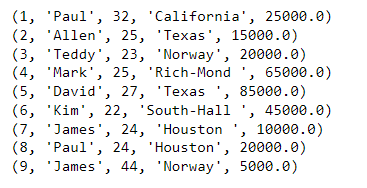

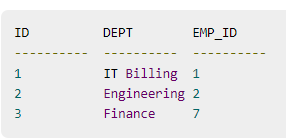

##### The CROSS JOIN


In SQLite, a CROSS JOIN returns the Cartesian product of the two tables involved 

    meaning it joins every row of the first table with every row of the second table.

If the input tables have x and y row, respectively, the resulting table will have x*y row.

In [ ]:
import sqlite3

conn = sqlite3.connect(db)

with conn:

    cur = conn.cursor()
    cur.execute("SELECT EMP_ID, NAME, DEPT FROM COMPANY CROSS JOIN DEPARTMENT;")

    rows = cur.fetchall()

    for row in rows:
        print (row)

##### The INNER JOIN

An INNER JOIN returns only the rows that have matching values in both tables being joined.

It combines rows from two or more tables based on a related column (usually a key) and returns only those rows where a match is found in all tables.


In [ ]:
with conn:

    cur = conn.cursor()
    cur.execute("SELECT EMP_ID, NAME, DEPT FROM COMPANY INNER JOIN DEPARTMENT ON COMPANY.ID = DEPARTMENT.EMP_ID;")

    rows = cur.fetchall()

    for row in rows:
        print (row)

##### The OUTER JOIN

OUTER JOIN is an extension of INNER JOIN. 

Though SQL standard defines three types of OUTER JOINs: LEFT, RIGHT, and FULL, SQLite only supports the LEFT OUTER JOIN.

OUTER JOINs have a condition that is identical to INNER JOINs, expressed using an ON, USING, or NATURAL keyword. 

The initial results table is calculated the same way. 

Once the primary JOIN is calculated, an OUTER JOIN will take any unjoined rows from one or both tables, pad them out with NULLs, and append them to the resulting table.

In [ ]:
with conn:

    cur = conn.cursor()
    cur.execute("SELECT EMP_ID, NAME, DEPT FROM COMPANY LEFT OUTER JOIN DEPARTMENT ON COMPANY.ID = DEPARTMENT.EMP_ID;")

    rows = cur.fetchall()

    for row in rows:
        print (row)

✅ 1. CROSS JOIN

🔷 When to Use:

When you need all possible combinations of rows between two tables.

Often used in testing, Cartesian products, or generating pairwise combinations.

Rare in real-world business logic unless needed deliberately.

🧠 Example Use Case:

You want to pair each employee with each project, even if there's no direct relationship.

✅ 2. INNER JOIN

🔷 When to Use:
When you need only the matching records from both tables based on a condition.

This is the most common join used in SQL. This joins creates Intersction of the data from both tables

Use it when you're interested only in related data.

🧠 Example Use Case:
You want to list only those employees who belong to a department.

📌 Result:
Rows are returned only when there is a match in both tables.

✅ 3. LEFT OUTER JOIN (SQLite only supports LEFT OUTER JOIN)

🔷 When to Use:
When you want all records from the left table, and matching records from the right table if they exist.

Use when you want to preserve unmatched data from the left side.

🧠 Example Use Case:
You want to list all employees, including those without departments.

📌 Result:
All rows from left table + matched rows from right table (or NULL if no match).